# Get data of heart diase

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy data và tiền xử lý

In [11]:
df = pd.read_csv("../datasets/heart_disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Các thuộc tính của dataset

- Tổng quan số người bệnh và tỉ lệ mắc bệnh trong tập dữ liệu mẫu

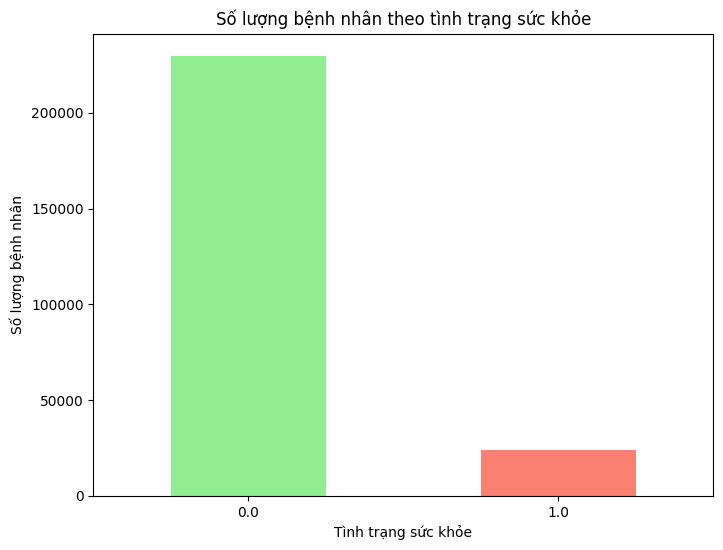

Tổng quan dữ liệu
Tổng số người: 253680
Số lượng người không mắc bệnh 229787
Số lượng người mắc bệnh tim 23893


In [12]:

disease_counts = df["HeartDiseaseorAttack"].value_counts()
plt.figure(figsize=(8, 6))
disease_counts.plot(kind="bar", color=["lightgreen", "salmon"])
plt.title("Số lượng bệnh nhân theo tình trạng sức khỏe")
plt.xlabel("Tình trạng sức khỏe")
plt.ylabel("Số lượng bệnh nhân")
plt.xticks(rotation=0)
plt.show()
print("Tổng quan dữ liệu")
print('Tổng số người:', len(df))

print("Số lượng người không mắc bệnh",disease_counts[0])
print("Số lượng người mắc bệnh tim", disease_counts[1])
# print("Phần trăm người mắc bệnh:", (disease_counts['Bệnh'] / len(df)) * 100, "%")



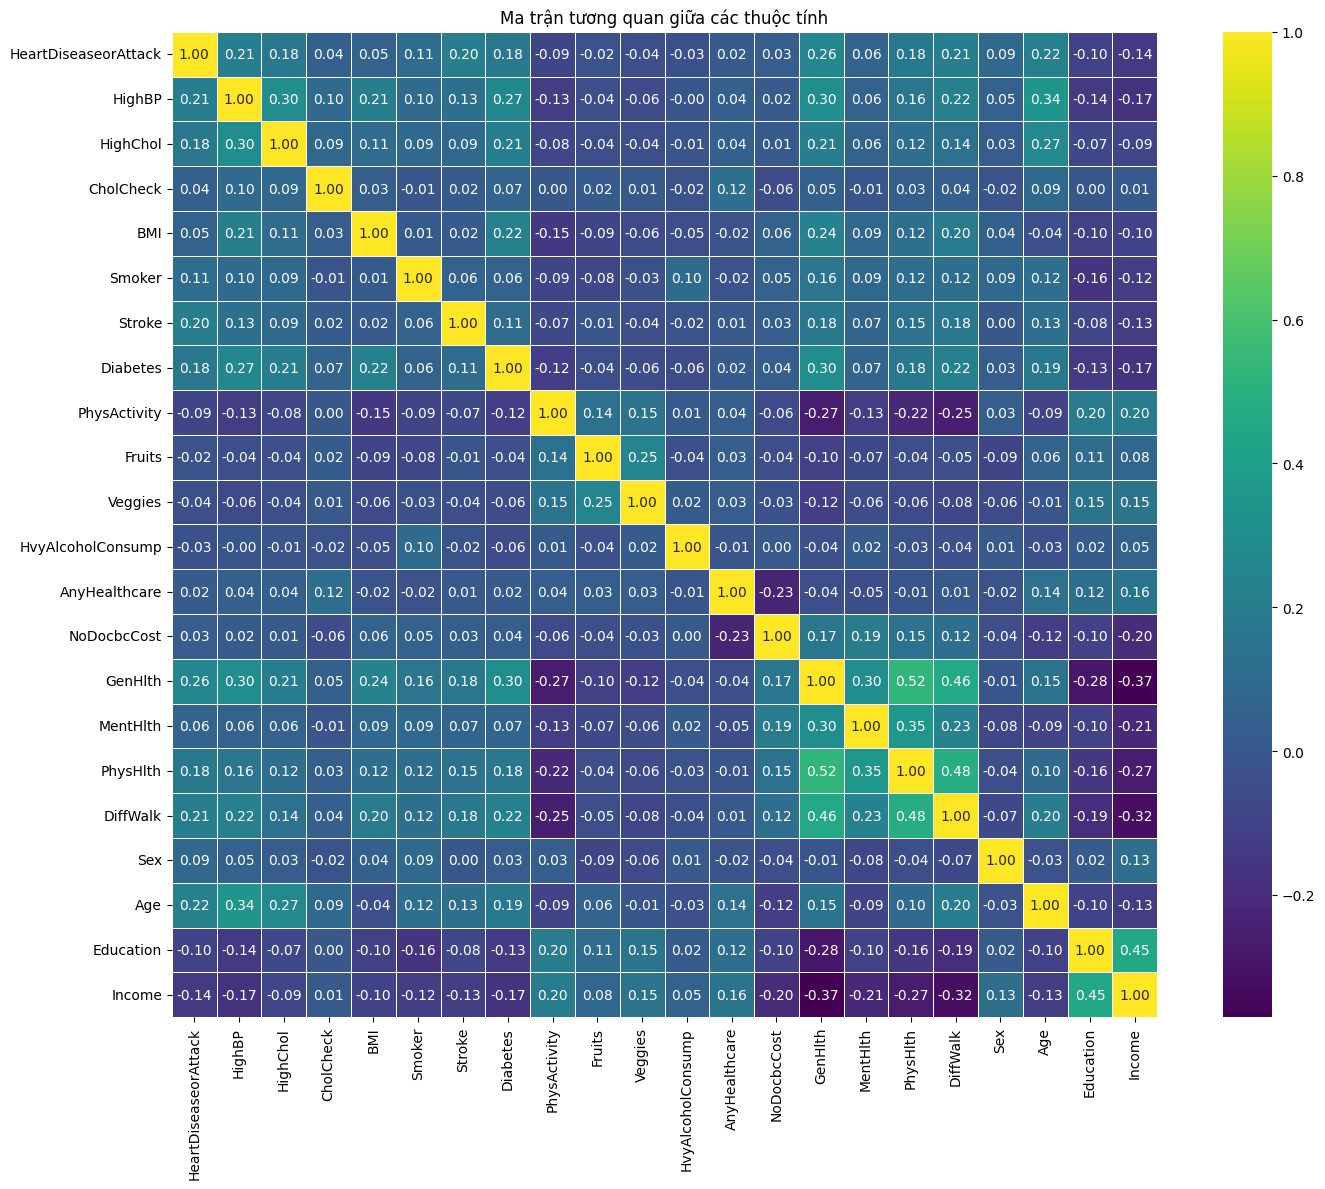

In [13]:
other = df.drop(columns=["HeartDiseaseorAttack"])
correlation_matrix = df.corr(numeric_only=True)
first_column_corr = correlation_matrix.iloc[0]



plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", square=True, linewidths=0.5)

plt.title("Ma trận tương quan giữa các thuộc tính")
plt.tight_layout()
plt.show()


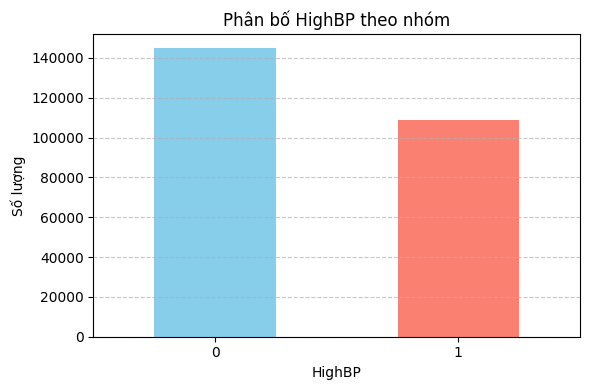

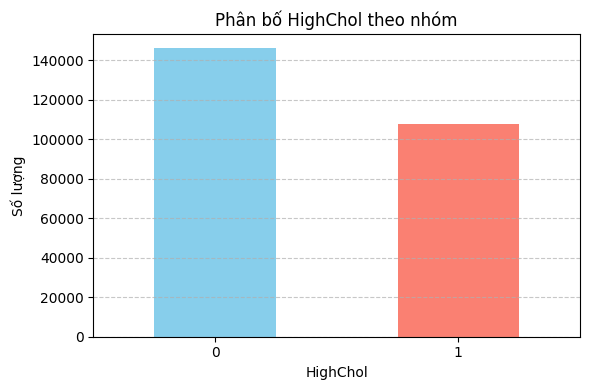

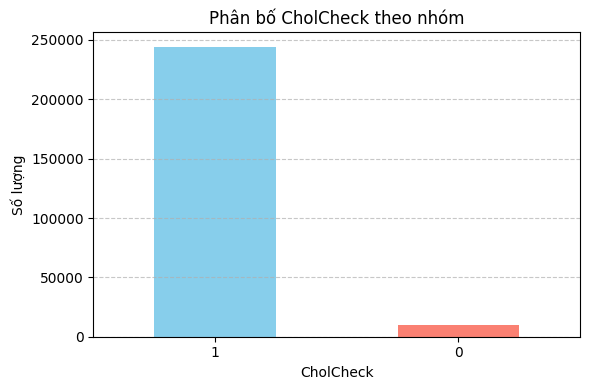

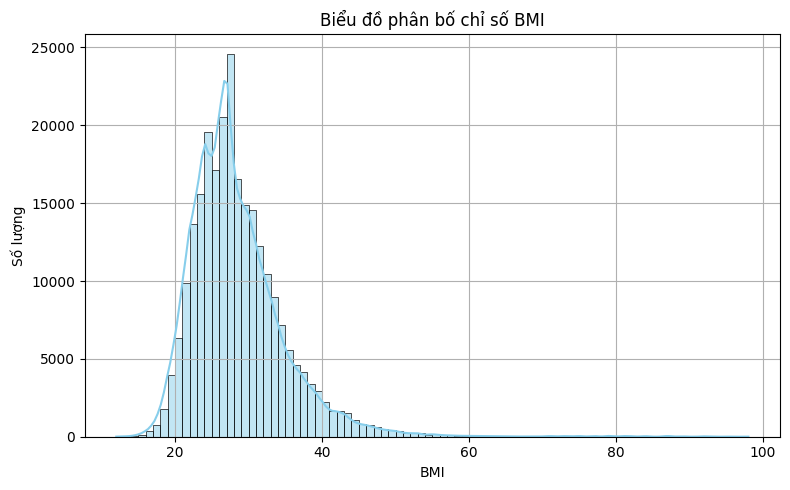

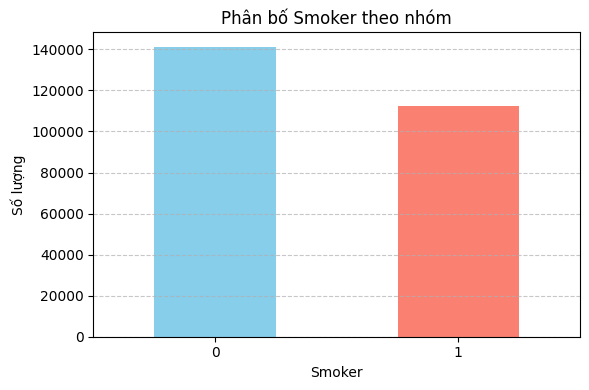

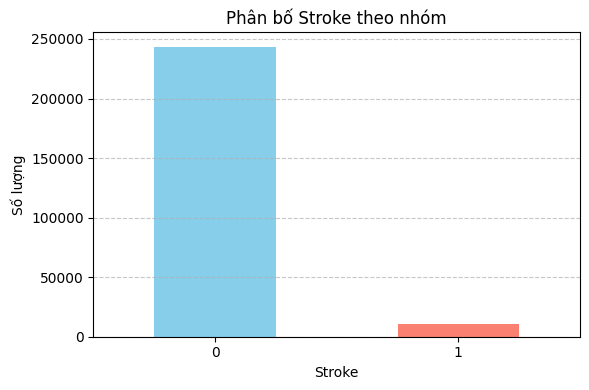

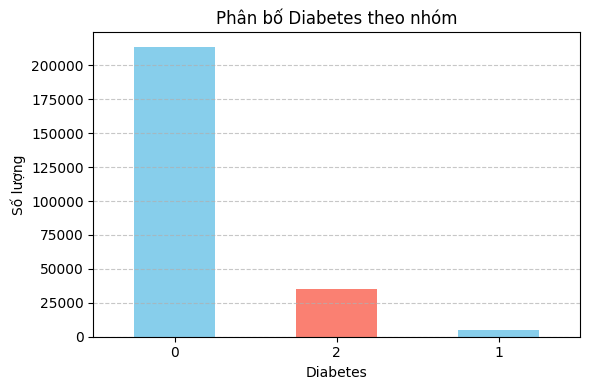

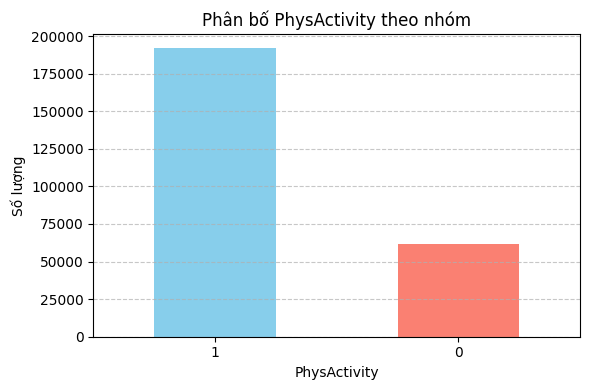

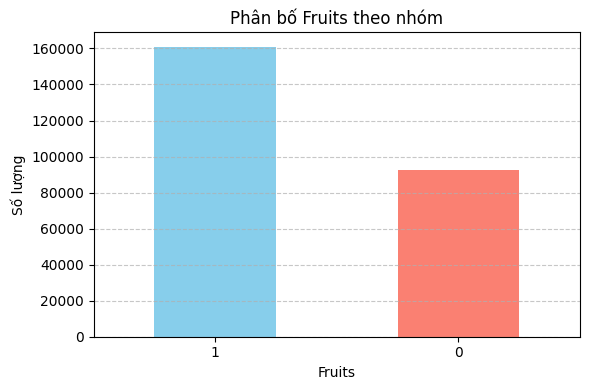

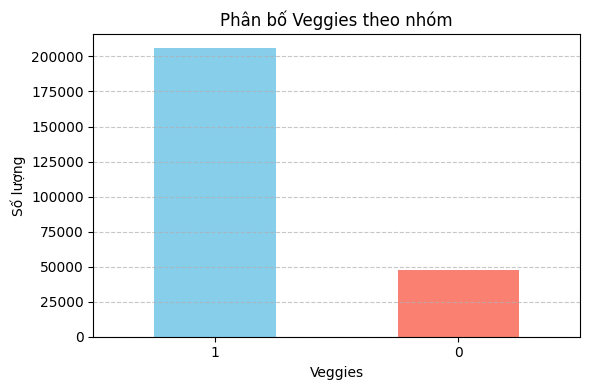

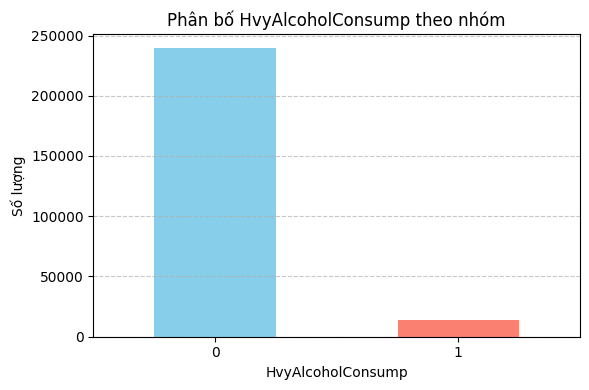

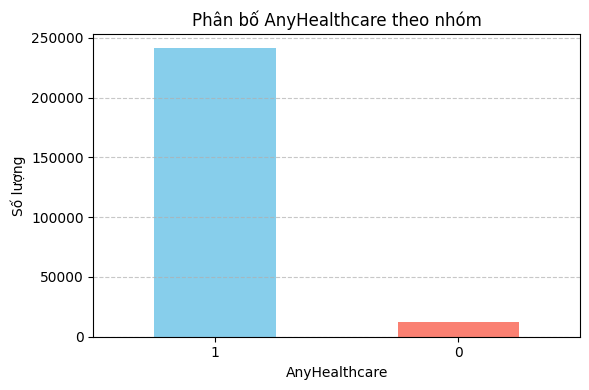

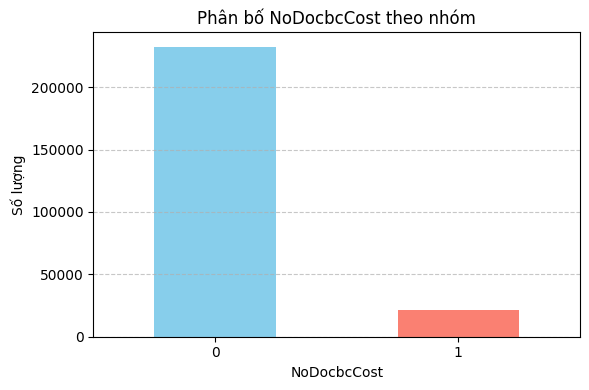

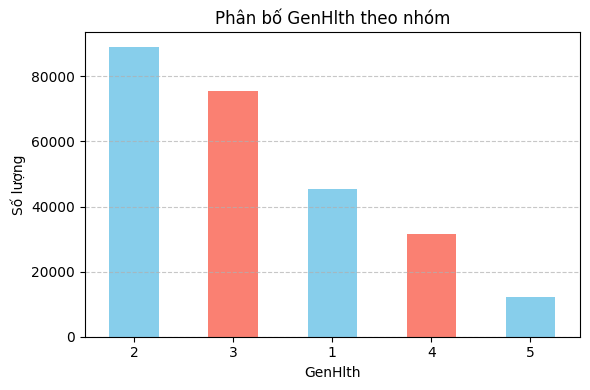

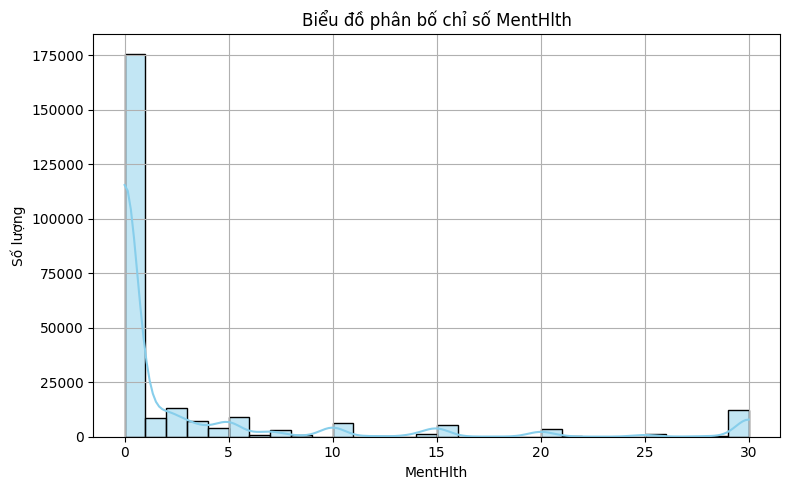

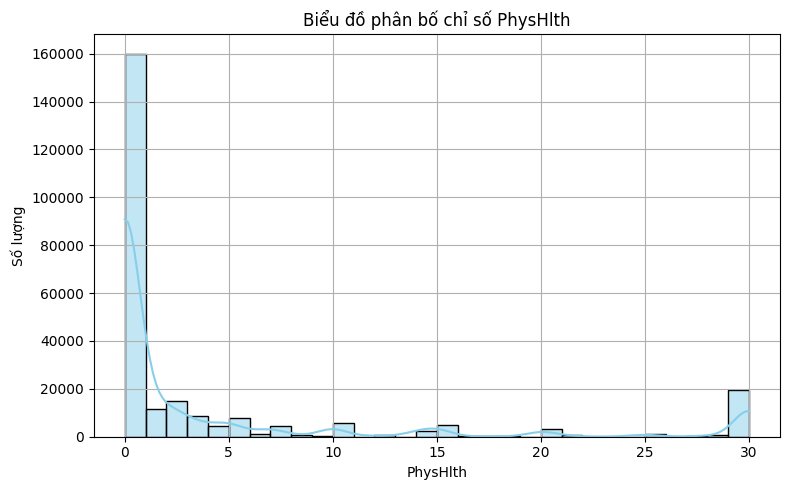

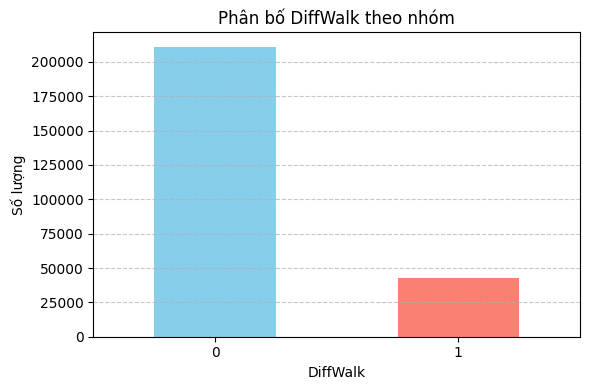

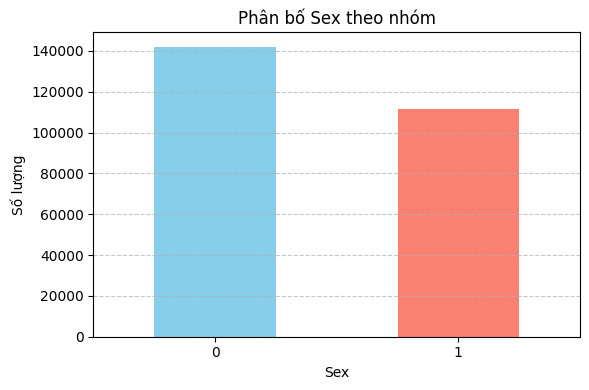

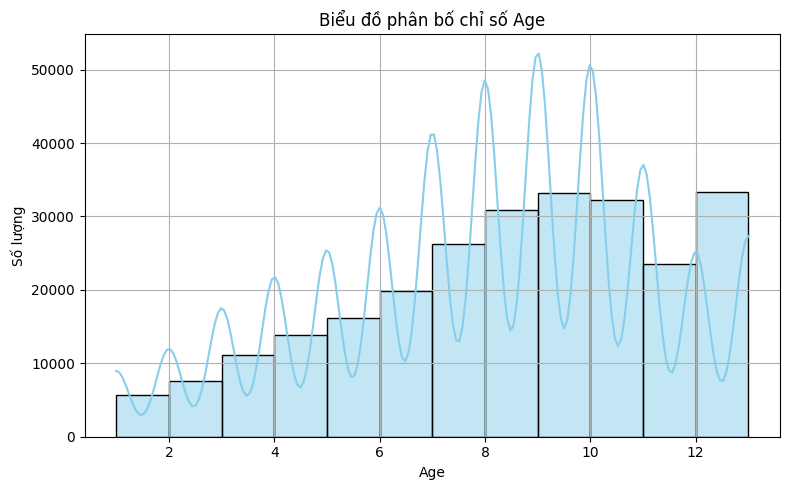

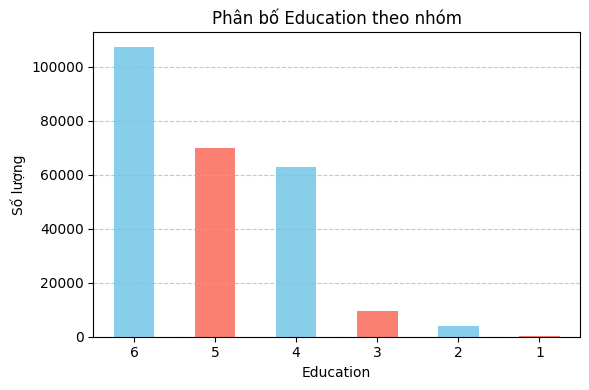

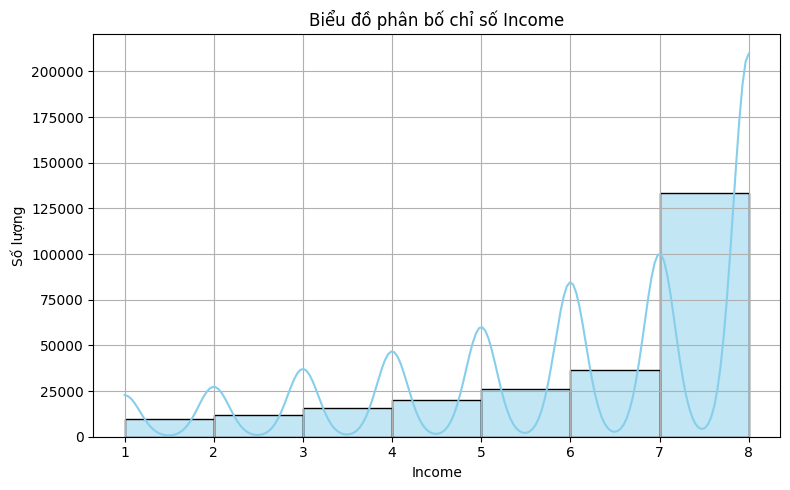

In [14]:
for x in other.columns:
    df[x] = df[x].astype(int)
    target_counts = df[x].value_counts()
    if target_counts.shape[0] > 6:
        min_bmi = int(df[x].min())
        max_bmi = int(df[x].max())
        plt.figure(figsize=(8, 5))
        sns.histplot(df[x], bins=range(min_bmi, max_bmi + 1), kde=True, color='skyblue', edgecolor='black')

        plt.title(f'Biểu đồ phân bố chỉ số {x}')
        plt.xlabel(f'{x}')
        plt.ylabel('Số lượng')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
        plt.title(f"Phân bố {x} theo nhóm")
        plt.xlabel(f'{x}')
        plt.ylabel("Số lượng")
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()